In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score

In [ ]:
df1 = pd.read_csv("./drive/MyDrive/portsmouth/Country-data.csv")
df1

country  child_mort  exports  ...  life_expec  total_fer   gdpp
0            Afghanistan        90.2     10.0  ...        56.2       5.82    553
1                Albania        16.6     28.0  ...        76.3       1.65   4090
2                Algeria        27.3     38.4  ...        76.5       2.89   4460
3                 Angola       119.0     62.3  ...        60.1       6.16   3530
4    Antigua and Barbuda        10.3     45.5  ...        76.8       2.13  12200
..                   ...         ...      ...  ...         ...        ...    ...
162              Vanuatu        29.2     46.6  ...        63.0       3.50   2970
163            Venezuela        17.1     28.5  ...        75.4       2.47  13500
164              Vietnam        23.3     72.0  ...        73.1       1.95   1310
165                Yemen        56.3     30.0  ...        67.5       4.67   1310
166               Zambia        83.1     37.0  ...        52.0       5.40   1460

[167 rows x 10 columns]

<AxesSubplot:>

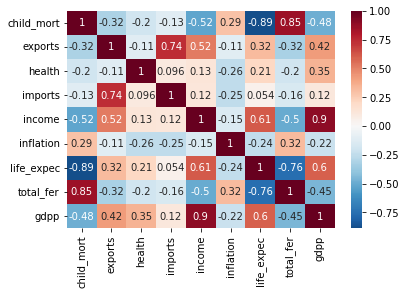

In [ ]:
sns.heatmap(df1.corr(), cmap='RdBu_r', annot=True, center=0)

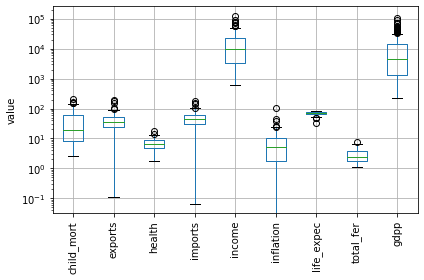

In [ ]:
df1.boxplot()
plt.ylabel("value")
plt.xticks(rotation=90)
plt.yscale('log')
plt.tight_layout()
plt.show()

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df1.drop('country', axis=1))

pca = PCA(n_components=6)
X_pc = pca.fit_transform(X)

0.9043610971613385


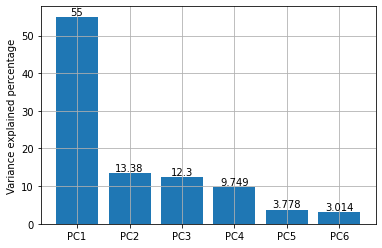

In [52]:
fig, ax = plt.subplots()
bars = ax.bar(np.linspace(0,5,6), 100*pca.explained_variance_ratio_)
bar_labels = ax.bar_label(bars, fmt='%.4g')
x_ticks = plt.xticks(np.linspace(0,5,6), ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
plt.ylabel("Variance explained percentage")
plt.grid()

print(sum(pca.explained_variance_ratio_[:4]))

0.35361542968982107


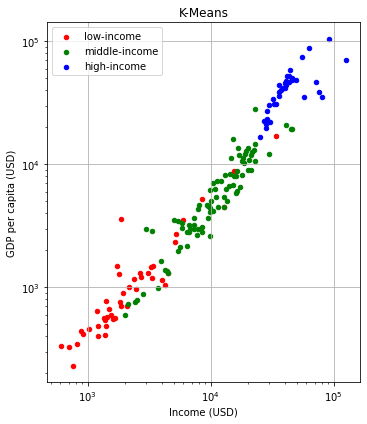

In [98]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_pc)
df1['kmeans'] = kmeans.labels_
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect("equal")
df1[df1['kmeans']==0].plot('income', 'gdpp', kind='scatter',ax=ax, c='r', label='low-income')
df1[df1['kmeans']==2].plot('income', 'gdpp', kind='scatter',ax=ax, c='g', label='middle-income')
df1[df1['kmeans']==1].plot('income', 'gdpp', kind='scatter',ax=ax, c='b', label='high-income')
plt.yscale('log')
plt.xscale('log')
plt.title("K-Means")
plt.xlabel("Income (USD)")
plt.ylabel("GDP per capita (USD)")
plt.grid()
plt.tight_layout()
print(silhouette_score(X_pc, kmeans.labels_))

0.3580337525275203


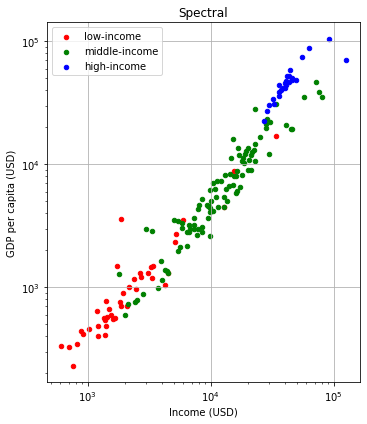

In [100]:
spec = SpectralClustering(n_clusters=3, random_state=0, n_neighbors=10, n_jobs=3, affinity='nearest_neighbors').fit(X_pc)
df1['spec'] = spec.labels_
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect("equal")
df1[df1['spec']==2].plot('income', 'gdpp', kind='scatter',ax=ax, c='r', label='low-income')
df1[df1['spec']==0].plot('income', 'gdpp', kind='scatter',ax=ax, c='g', label='middle-income')
df1[df1['spec']==1].plot('income', 'gdpp', kind='scatter',ax=ax, c='b', label='high-income')
plt.yscale('log')
plt.xscale('log')
plt.title("Spectral")
plt.xlabel("Income (USD)")
plt.ylabel("GDP per capita (USD)")
plt.grid()
plt.tight_layout()
print(silhouette_score(X_pc, spec.labels_))


In [ ]:
df2 = pd.read_csv("./drive/MyDrive/portsmouth/Mall_Customers.csv", index_col=0)
df2

Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40
...            ...  ...                 ...                     ...
196         Female   35                 120                      79
197         Female   45                 126                      28
198           Male   32                 126                      74
199           Male   32                 137                      18
200           Male   30                 137                      83

[200 rows x 4 columns]

In [ ]:
df2['Gender'] = 1 * (df2['Gender'] == "Female")

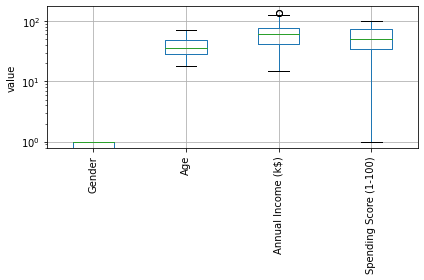

In [ ]:
df2.boxplot()
plt.ylabel("value")
plt.xticks(rotation=90)
plt.yscale('log')
plt.tight_layout()
plt.show()

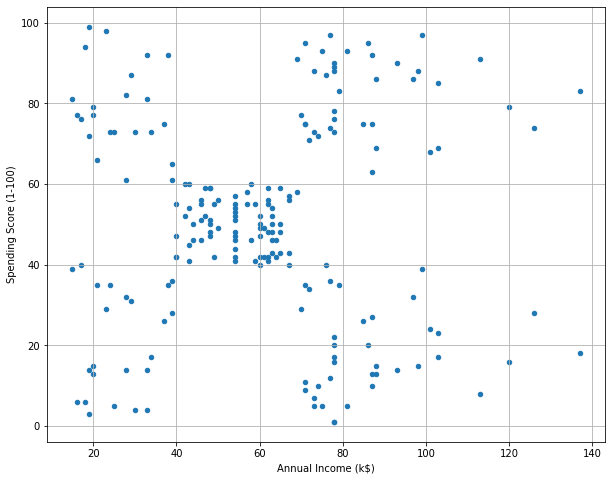

In [142]:
fig, ax = plt.subplots(figsize=(10,8))
df2.plot('Annual Income (k$)', 'Spending Score (1-100)', kind='scatter',ax=ax, s=20)
plt.grid()

0.4457986124228593


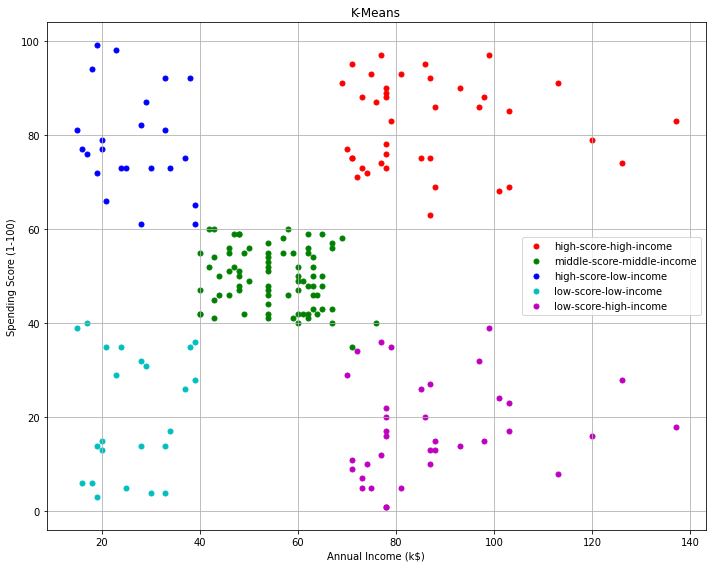

In [145]:
kmeans = KMeans(n_clusters=5, random_state=1).fit(df2)
df2['kmeans'] = kmeans.labels_
fig, ax = plt.subplots(figsize=(10,8))

df2[df2['kmeans']==1].plot('Annual Income (k$)', 'Spending Score (1-100)', kind='scatter',ax=ax, c='r', label="high-score-high-income", s=25)
df2[df2['kmeans']==0].plot('Annual Income (k$)', 'Spending Score (1-100)', kind='scatter',ax=ax, c='g', label="middle-score-middle-income", s=25)
df2[df2['kmeans']==2].plot('Annual Income (k$)', 'Spending Score (1-100)', kind='scatter',ax=ax, c='b', label="high-score-low-income", s=25)
df2[df2['kmeans']==4].plot('Annual Income (k$)', 'Spending Score (1-100)', kind='scatter',ax=ax, c='c', label="low-score-low-income", s=25)
df2[df2['kmeans']==3].plot('Annual Income (k$)', 'Spending Score (1-100)', kind='scatter',ax=ax, c='m', label="low-score-high-income", s=25)
plt.title("K-Means")
plt.grid()
plt.tight_layout()
print(silhouette_score(df2, kmeans.labels_))

0.44604204850207835


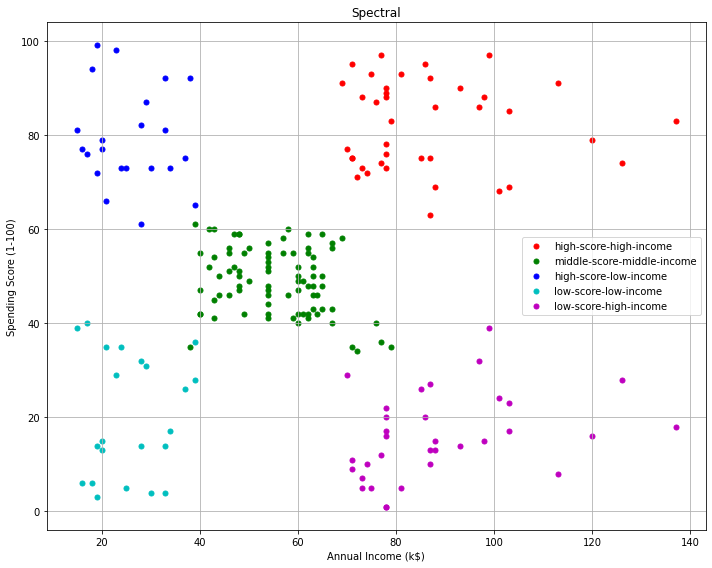

In [146]:
spec = SpectralClustering(n_clusters=5, random_state=0, n_neighbors=10, n_jobs=3, affinity='nearest_neighbors').fit(df2)
df2['spec'] = spec.labels_
fig, ax = plt.subplots(figsize=(10,8))
df2[df2['spec']==1].plot('Annual Income (k$)', 'Spending Score (1-100)', kind='scatter',ax=ax, c='r', label="high-score-high-income", s=25)
df2[df2['spec']==2].plot('Annual Income (k$)', 'Spending Score (1-100)', kind='scatter',ax=ax, c='g', label="middle-score-middle-income", s=25)
df2[df2['spec']==4].plot('Annual Income (k$)', 'Spending Score (1-100)', kind='scatter',ax=ax, c='b', label="high-score-low-income", s=25)
df2[df2['spec']==0].plot('Annual Income (k$)', 'Spending Score (1-100)', kind='scatter',ax=ax, c='c', label="low-score-low-income", s=25)
df2[df2['spec']==3].plot('Annual Income (k$)', 'Spending Score (1-100)', kind='scatter',ax=ax, c='m', label="low-score-high-income", s=25)
plt.title("Spectral")
plt.grid()
plt.tight_layout()
print(silhouette_score(df2, spec.labels_))